# 6.- Modeling 

Machine learning model implementation

In [6]:
#Libraries utilized
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#evaluating the model
from sklearn.metrics import mean_squared_error, r2_score


#Libraries for the 
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

#scatter plot
import matplotlib.pyplot as plt
from pandasgui import show

#Polinomial regression
from sklearn.preprocessing import PolynomialFeatures

### Loading the reduced dataset

In [7]:
#Loading from the previously processed dataframe
population_data_origin  = pd.read_csv('datasets/population_merged_reduced.csv',  sep=",",low_memory=False)

# Display the DataFrame information including data types
population_data_origin.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17538 entries, 0 to 17537
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       17538 non-null  int64  
 1   LocID            17538 non-null  int64  
 2   Time             17538 non-null  int64  
 3   TPopulation1Jan  17538 non-null  float64
 4   PopDensity       17538 non-null  float64
 5   PopSexRatio      17538 non-null  float64
 6   MedianAgePop     17538 non-null  float64
 7   PopGrowthRate    17538 non-null  float64
 8   DoublingTime     17538 non-null  float64
 9   MAC              17538 non-null  float64
 10  SRB              17538 non-null  float64
 11  CDR              17538 non-null  float64
 12  NetMigrations    17538 non-null  float64
 13  Location         17538 non-null  object 
dtypes: float64(10), int64(3), object(1)
memory usage: 1.9+ MB


In [8]:
#Deleting first attribute garbage generated
population_data_origin = population_data_origin.iloc[:, 1:]

#show the dataframe
population_data_origin.head()


,LocID,Time,TPopulation1Jan,PopDensity,PopSexRatio,MedianAgePop,PopGrowthRate,DoublingTime,MAC,SRB,CDR,NetMigrations,Location
0,108,1950,2229.322,86.8637,91.9472,18.3147,2.200,31.5067,30.995,102.5,23.546,-13.343,Burundi
1,108,1951,2278.903,88.7571,92.1448,18.0842,2.114,32.7884,30.996,102.5,23.879,-13.217,Burundi
2,108,1952,2327.593,90.6179,92.3191,17.8744,2.036,34.0446,31.026,102.5,23.815,-13.715,Burundi
3,108,1953,2375.478,92.4508,92.4880,17.6693,1.969,35.2030,31.030,102.5,23.604,-14.962,Burundi
4,108,1954,2422.721,94.2874,92.6503,17.4706,1.965,35.2747,31.036,102.5,23.347,-14.599,Burundi


In [9]:
# For modeling we do not need the location name varchar type
population_data =  population_data_origin.drop("Location", axis='columns')

In [10]:
population_data.head()


,LocID,Time,TPopulation1Jan,PopDensity,PopSexRatio,MedianAgePop,PopGrowthRate,DoublingTime,MAC,SRB,CDR,NetMigrations
0,108,1950,2229.322,86.8637,91.9472,18.3147,2.200,31.5067,30.995,102.5,23.546,-13.343
1,108,1951,2278.903,88.7571,92.1448,18.0842,2.114,32.7884,30.996,102.5,23.879,-13.217
2,108,1952,2327.593,90.6179,92.3191,17.8744,2.036,34.0446,31.026,102.5,23.815,-13.715
3,108,1953,2375.478,92.4508,92.4880,17.6693,1.969,35.2030,31.030,102.5,23.604,-14.962
4,108,1954,2422.721,94.2874,92.6503,17.4706,1.965,35.2747,31.036,102.5,23.347,-14.599


In [12]:
# Separate the independent variables (attributes) and the dependent variable
X = population_data.drop('TPopulation1Jan', axis=1)  # The dependent variavle drop
y = population_data['TPopulation1Jan']  # y for the dependent variable


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train[['LocID', 'Time']], y_train)



LinearRegression()

In [13]:
#make a future prediction 
X_new = pd.DataFrame({'LocID': [504], 'Time': [2020]})

# Predict the population
population_pred = model.predict(X_new)

print("Simple multiple linear regression ")

print( population_pred )

filter_column1_value = 504
filter_column2_value = 2020

#extracting the value from the 
filtered_df =    population_data[(population_data['LocID'] == filter_column1_value) 
                & (population_data['Time'] == filter_column2_value)]
 
print(  filtered_df['TPopulation1Jan'].values )    


    

Simple multiple linear regression 
[32032.99055725]
[36488.843]


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


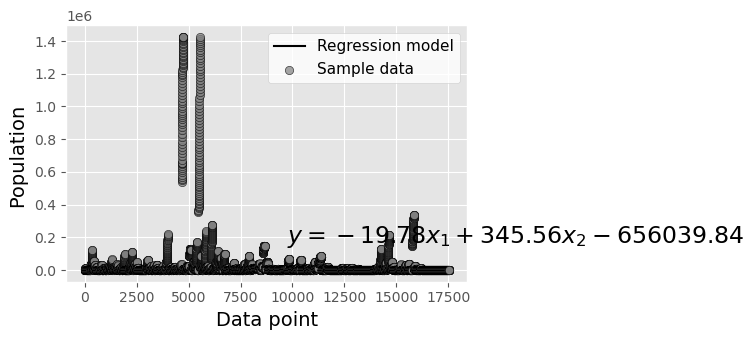

In [15]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(7, 3.5))

#Distinct the values for the countries in order for the first x1_pred
sorted_values = X['LocID'].drop_duplicates().sort_values()

# Generate data for visualization
x1_pred = np.linspace(np.min(sorted_values), np.max(sorted_values), len(sorted_values))
attribute_name = 'Time'

# Get the minimum and maximum values of the selected attribute
min_value = np.min(X[attribute_name])
max_value = np.max(X[attribute_name])

x2_pred_resized = np.linspace(min_value, max_value, len(x1_pred))

X_pred = np.column_stack((x1_pred, x2_pred_resized))  # Combine both parameters

y_pred = model.predict(X_pred)  # Predicted values for the combined parameters

# Visualization
ax.plot(y_pred, color='k', label='Regression model')
ax.scatter(range(len(y)), y, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')

ax.set_ylabel('Population ', fontsize=14)
ax.set_xlabel('Data point', fontsize=14)

ax.legend(facecolor='white', fontsize=11)
ax.text(0.55, 0.15, '$y = %.2f x_1 + %.2f x_2 - %.2f $' % (model.coef_[0], model.coef_[1], abs(model.intercept_)),
        fontsize=17, transform=ax.transAxes)

fig.tight_layout()

plt.show()


## Applying Modeling algorithms

Part of the questions I may need to ask involve my dependent variable, which is population size. However, I am specifically interested in making predictions based on years and country codes. While regression analysis is suitable for this task, I am also considering other algorithms to explore alternative approaches.

###  Multi-variable Linear Regression
is a statistical modeling technique used to analyze the relationship between multiple independent variables (also known as predictors or features) and a single continuous dependent variable. It extends the concept of simple linear regression, which considers only one independent variable, to incorporate multiple predictors.

In [ ]:
# Separate the independent variables (attributes) and the dependent variable
y = population_data['quantile']  # y for the dependent variable
X = population_data.drop('quantile', axis=1)  # The independent variables, dropping the dependent variable


#verification of y and X
print("Independent Attributes X ",X.shape)
print("Dependent Attribute y ", y.shape)

print("Max quantile ", max(y) , "Min Quantile ", min(y))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Split dataset training and test : X_train, X_test, y_train, y_test, Done!! ")

In [ ]:
#creation of the polynomial linear regression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_train[['LocID', 'Time']], y)

print("Creation of the Multiple linear regression Model  done !!")

In [ ]:
#verification of model coerficient
print( "Model Coeficients: ", model.coef_)


In [ ]:
#vertification  of model intercept
print("Model Intercept: ", model.intercept_)

In [ ]:
#make a future prediction 
X_new = pd.DataFrame({'LocID': [504], 'Time': [2020]})

# Predict the population
population_pred = model.predict(X_new)

print("If the dependent variable after applying QUANTILE DISCRETIZATION should be between 0 and 4 ")

print( population_pred )


In [ ]:
# Generate 

#### QUANTILE DISCRETIZATION :For better understanding of the data, and to achieve better I am applying the preprocessing technique quantile discretization that divides a continuous variable into a specified number of bins or intervals based on the quantiles of the data distribution

In [ ]:
#process of discretization
num_bins = 5
population_data['quantile'] = pd.qcut(population_data_origin['TPopulation1Jan'], num_bins, labels=False)

### Polynomial Regression Results:
Polynomial regression the type in which the relationship between the independent variable(s) and the dependent variable is modeled as an nth-degree polynomial. By fitting a polynomial curve to the data, polynomial regression can capture nonlinear relationships between the variables.

In [ ]:
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

### Long Short-Term Memory (LSTM) Networks: 
 
LSTM is a type of recurrent neural network (RNN) that can effectively model and predict sequences, including time series data. LSTM networks can capture long-term dependencies and are commonly used for time series forecasting tasks.



In [ ]:
# Separate the independent variables (attributes) and the dependent variable
X = population_data.drop('TPopulation1Jan', axis=1)  # Replace 'TPopulation1Jan' with the column name of your dependent variable
y = population_data['TPopulation1Jan']  # Replace 'TPopulation1Jan' with the column name of your dependent variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape input data to fit the LSTM input shape [samples, time steps, features]
X_train = np.reshape(X_train.values, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test.values, (X_test.shape[0], X_test.shape[1], 1))

# Create the LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Make predictions on the test data
predictions = model.predict(X_test)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

In [ ]:

# Data prepared in the following format:
# X_train: Training features (input sequence)
# y_train: Training labels (output/target)
# X_test: Test features (input sequence)
# y_test: Test labels (output/target)

# Reshape input data to fit the LSTM input shape [samples, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]*X_train.shape[2]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]*X_test.shape[2]))

# Create the LSTM model
model = Sequential()
#model.add(LSTM(units=50, input_shape=(X_train.shape[1],)))
model.add(LSTM(units=50, input_shape=(X_train.shape[1], 1)))

model.add(Dense(units=1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Make predictions on the test data
predictions = model.predict(X_test)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
